In [2]:
import pandas as pd

# Language Modelling

RNN language models (with LSTM cells) were trained on monolingual word lists in 2 configurations: 

- one-hot embeddings
- phonetic vectors

##  Experimental Settings

- LSTM based LM implementation: Modification of Tensorflow's PTB LM sample code
- Configuration: 
  - init_scale = 0.1
  - learning_rate = 1.0
  - max_grad_norm = 5
  - num_layers = 2
  - num_steps = 20
  - hidden_size = 200
  - max_epoch = 4
  - max_max_epoch = 13
  - keep_prob = 1.0
  - lr_decay = 0.5
  - batch_size = 20
  - GradientDescent Optimizer

** Note** 

- For characters which don't have phonetic embeddings, one-hot embeddings were used
- LMs were trained with varying amounts of training corpora (number of words)

## Results 
** (See table below) ** 

_Experiment name: 1-train-size _

- The perplexity of the models trained with phonetic representation is substantially less than that of one-hot representation. 
- With increase in data-size, the phonetic representation seems to be doing better.
- Corpus normalization reduces perplexity. The original NEWS corpus contains nukta-adjoined characters as a single codepoint. Normalization separates the nukta and the character and a phonetic embedding is clearly useful for that


In [42]:
lm_results_fname='lm_results.csv'

In [43]:
lm_results=pd.read_csv(lm_results_fname,sep='|',names=['set','size','exp','lang','perplexity'])

** Dataset: CoNLL 2016 paper dataset **

In [44]:
lm_results[lm_results['set']=='conll16'].pivot_table(index=['size'],columns=['lang','exp'],values=['perplexity'])

perplexity                                                            
lang          bn               hi               kn               ta         
exp       onehot phonetic  onehot phonetic  onehot phonetic  onehot phonetic
size                                                                        
1000      15.500   15.367  16.774   16.661  14.657   14.648  12.966   13.211
2000      13.923   13.890  15.369   15.217  12.398   12.468  11.042   11.412
5000      12.430   12.463  13.700   13.872  11.783   11.341   9.672    9.657
15000     12.687   11.923  13.700   12.790  10.918    9.916   9.706    8.842
25000     12.031   11.126  13.067   12.258   9.771    9.141   8.780    8.376
35000     11.577   10.693  12.571   11.636   9.220    8.675   8.379    8.106

** Dataset: Old NEWS 2012 dataset (the one used by Gurneet in his experiments) **

In [45]:
lm_results[lm_results['set']=='news12_old'].pivot_table(index=['size'],columns=['lang','exp'],values=['perplexity'])

perplexity                          
lang          hi               kn         
exp       onehot phonetic  onehot phonetic
size                                      
1000      17.730   17.309  12.436   12.283
2000      15.629   15.206  11.241   11.152
5000      13.095   12.981   9.875    9.876
8000      12.577   12.188   9.498    9.285
10000     12.313   11.999   9.388    9.209
13000     12.223   11.783   9.135    8.942

** Dataset: NEWS 2012 dataset (Old NEWS 2012 corpus normalized) **

In [46]:
lm_results[lm_results['set']=='news12'].pivot_table(index=['size'],columns=['lang','exp'],values=['perplexity'])

perplexity                          
lang          hi               kn         
exp       onehot phonetic  onehot phonetic
size                                      
1000      17.524   16.789  12.494   12.315
2000      14.879   15.157  11.159   11.142
5000      12.704   12.735   9.926    9.882
8000      12.285   11.869   9.511    9.488
10000     12.017   11.698   9.368    9.111
13000     12.036   11.209   9.289    8.773

# For Reference, results from CoNLL 2016 paper

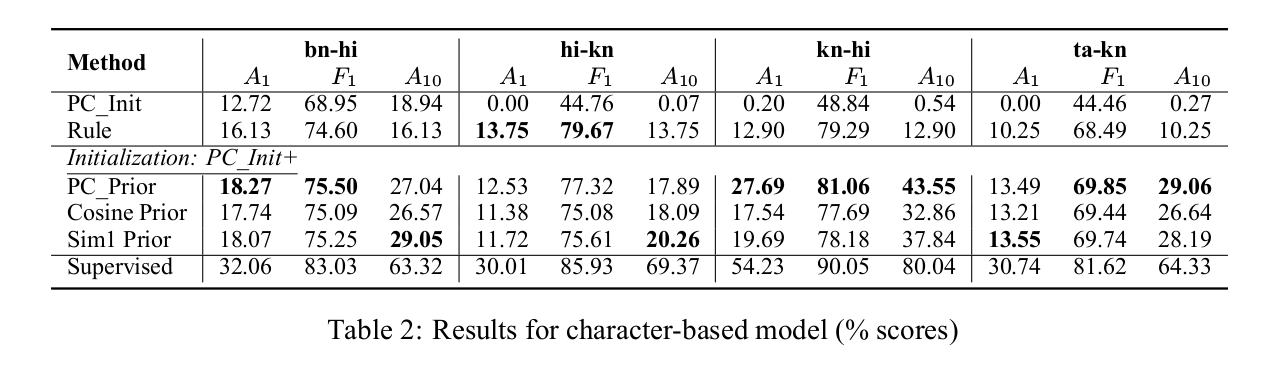

In [88]:
from IPython.display import Image
Image(filename='char_model_conll2016.png') 

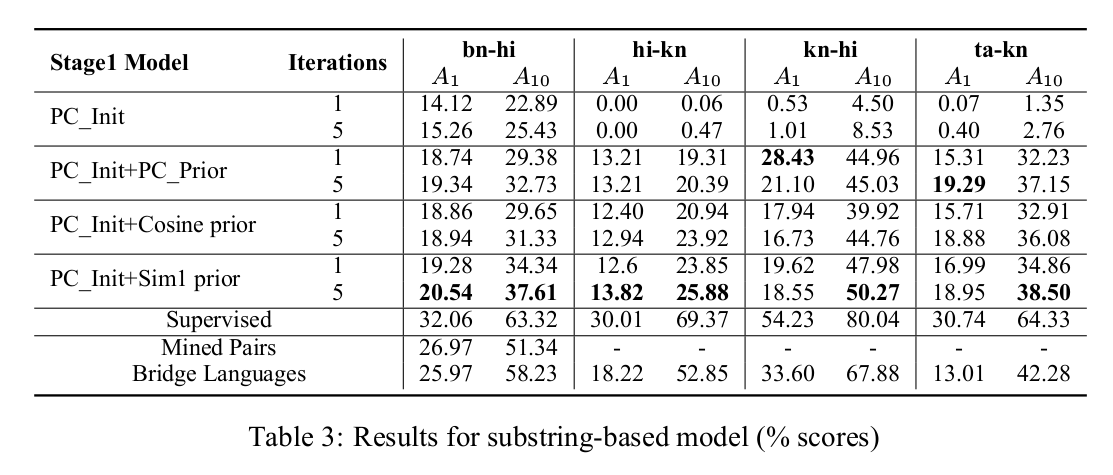

In [90]:
from IPython.display import Image
Image(filename='substring_model_conll2016.png') 

# Supervised Transliteration 

In [91]:
supxlit_rtable=pd.read_csv('sup_transliteration.csv',sep='|',
            header=None, index_col=False,
            names=['model','exp','representation','slang','tlang','a1','f1','mrr','mapref','a10'])

In [82]:
s=supxlit_rtable[supxlit_rtable.exp.isin(['1_sup_nomono','2_bisup_nomono','3_sup_mono','4_bisup_mono'])]
s1=s.pivot_table(index=['slang','tlang','exp'],columns=['representation'],values=['a1','f1'])
s1

a1                  f1          
representation                onehot  phonetic    onehot  phonetic
slang tlang exp                                                   
bn    hi    1_sup_nomono    0.129853  0.149264  0.697085  0.702033
            2_bisup_nomono  0.119143  0.036145  0.686346  0.575166
            3_sup_mono      0.212851  0.220884  0.774330  0.778855
            4_bisup_mono    0.200803  0.198126  0.761111  0.760861
hi    kn    1_sup_nomono    0.296748  0.295393  0.795392  0.789243
            2_bisup_nomono  0.207317  0.179539  0.764597  0.729369
            3_sup_mono      0.346206  0.331978  0.843199  0.844192
            4_bisup_mono    0.323848  0.310976  0.836269  0.835371
ta    kn    1_sup_nomono    0.176669  0.172623  0.706477  0.717313
            2_bisup_nomono  0.148348  0.081591  0.690649  0.624450
            3_sup_mono      0.207687  0.223196  0.759588  0.769590
            4_bisup_mono    0.219150  0.180040  0.766475  0.742832

In [83]:
sb=supxlit_rtable[supxlit_rtable.model==3]
sb1=sb.pivot_table(index=['slang','tlang','exp'],columns=['representation'],values=['a1','f1'])
sb1

a1                  f1          
representation             onehot  phonetic    onehot  phonetic
slang tlang exp                                                
bn    hi    3_2_use_src  0.188086  0.211513  0.752509  0.757776
            3_3_use_tgt  0.198795  0.193440  0.761371  0.757794
            3_sup_mono   0.212851  0.220884  0.774330  0.778855
hi    kn    3_2_use_src  0.371951  0.362466  0.839440  0.832799
            3_3_use_tgt  0.327236  0.341463  0.832164  0.836699
            3_sup_mono   0.346206  0.331978  0.843199  0.844192
ta    kn    3_2_use_src  0.196898  0.220499  0.754711  0.760954
            3_3_use_tgt  0.200270  0.217802  0.748968  0.762068
            3_sup_mono   0.207687  0.223196  0.759588  0.769590

In [75]:
sc=supxlit_rtable[supxlit_rtable.model==4]
sc1=sc.pivot_table(index=['slang','tlang','exp'],columns=['representation'],values=['a1','f1'])
sc1

a1                  f1          
representation                 onehot  phonetic    onehot  phonetic
slang tlang exp                                                    
bn    hi    4_2_all_loss     0.222222  0.226238  0.780502  0.780021
            4_3_ll_rep_loss  0.214859  0.197456  0.777272  0.750971
            4_bisup_mono     0.200803  0.198126  0.761111  0.760861
hi    kn    4_2_all_loss     0.319106  0.319783  0.845715  0.840886
            4_3_ll_rep_loss  0.262873  0.275745  0.827964  0.819142
            4_bisup_mono     0.323848  0.310976  0.836269  0.835371
ta    kn    4_2_all_loss     0.230614  0.224545  0.775899  0.776561
            4_3_ll_rep_loss  0.198247  0.185435  0.748110  0.733754
            4_bisup_mono     0.219150  0.180040  0.766475  0.742832

# Unsupervised Transliteration

In [84]:
unsupxlit_rtable=pd.read_csv('unsup_transliteration.csv',sep='|',
            header=None, index_col=False,
            names=['model','exp','representation','slang','tlang','a1','f1','mrr','mapref','a10'])
unsupxlit_rtable.head()

,model,exp,representation,slang,tlang,a1,f1,mrr,mapref,a10
0,1,1_again,onehot,ta,kn,0.018881,0.477833,0.018881,0.018881,0.018881
1,1,1_again,onehot,hi,kn,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,1_again,onehot,bn,hi,0.020750,0.493181,0.020750,0.020750,0.020750
3,1,1_again,phonetic,ta,kn,0.062711,0.589762,0.062711,0.062711,0.062711
4,1,1_again,phonetic,hi,kn,0.099593,0.735414,0.099593,0.099593,0.099593


In [87]:
s1=unsupxlit_rtable.pivot_table(index=['slang','tlang'],columns=['representation'],values=['a1','f1'])
s1

a1                  f1          
representation    onehot  phonetic    onehot  phonetic
slang tlang                                           
bn    hi        0.020750  0.087015  0.493181  0.618040
hi    kn        0.000000  0.099593  0.000000  0.735414
ta    kn        0.018881  0.062711  0.477833  0.589762